In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv("customer_train.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [9]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [29]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [11]:
df.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [30]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
df['Income'].fillna(df['Income'].median(), inplace= True)
df.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'],inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


In [13]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df['Customer_years']=2025-df['Dt_Customer'].dt.year #new feature : Number of years since enrollment
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_years
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,0,0,3,11,1,13
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,0,0,3,11,0,11
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,0,0,3,11,0,12
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,0,0,3,11,0,11
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,0,0,3,11,0,11


In [14]:
df["Age"] = 2025-df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_years,Age
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,0,3,11,1,13,68
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,0,3,11,0,11,71
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,0,3,11,0,12,60
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,0,3,11,0,11,41
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,0,3,11,0,11,44


In [39]:
# Convert categorical variables to numerical (if any)
label_encoder = LabelEncoder()
df['Education']=label_encoder.fit_transform(df['Education'])
df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])
df.dtypes

ID                              int64
Year_Birth                      int64
Education                       int32
Marital_Status                  int32
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

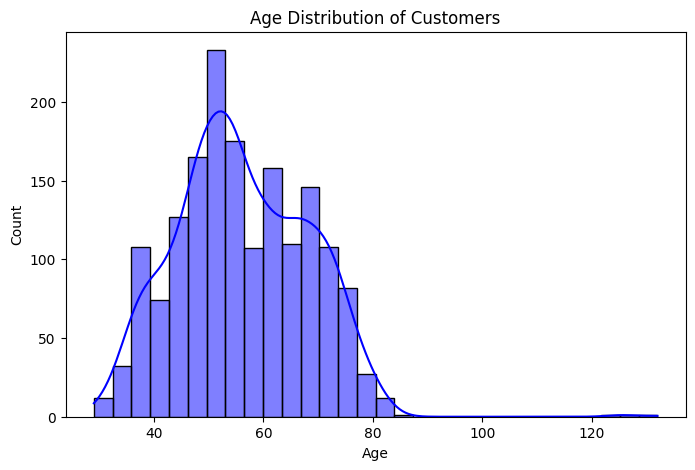

In [15]:
# Plot Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=30, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

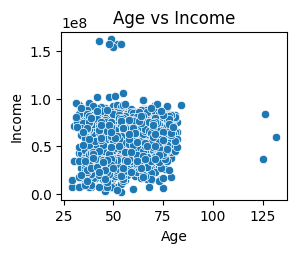

In [16]:
plt.subplot(2,2,3)
sns.scatterplot(df, x='Age', y='Income')
plt.title('Age vs Income')
plt.show()

Text(0.5, 1.0, 'Income Distribution')

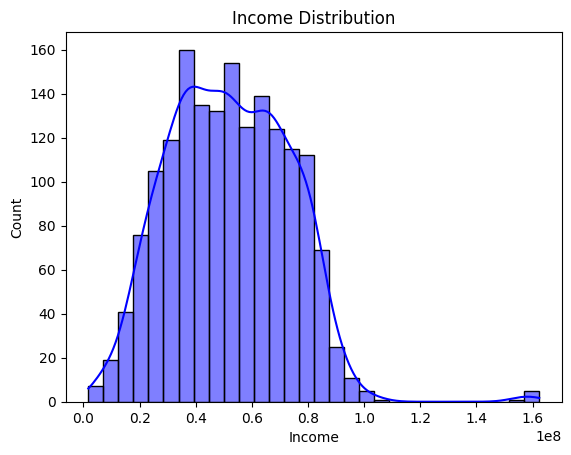

In [49]:
sns.histplot(df['Income'],bins=30, kde=True, color='blue')
plt.title('Income Distribution')

Text(0.5, 1.0, 'Total Amount Spent Distribution')

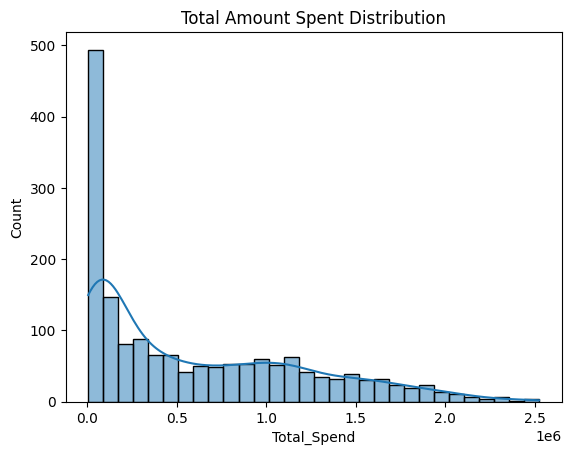

In [17]:
# Calculate total spending
df['Total_Spend'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                         'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
sns.histplot(df['Total_Spend'], bins=30, kde=True)
plt.title('Total Amount Spent Distribution')

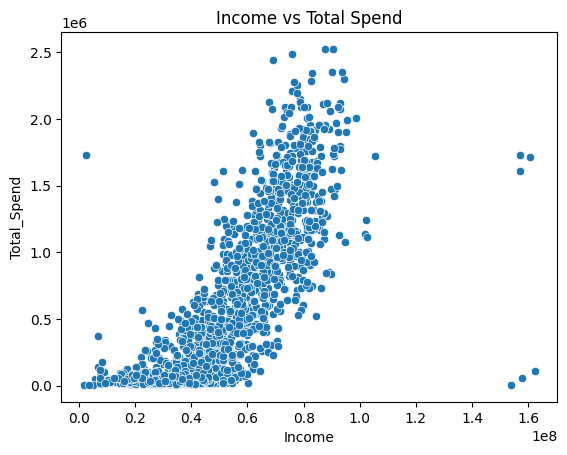

In [50]:
sns.scatterplot(df, x='Income', y='Total_Spend')
plt.title('Income vs Total Spend')
plt.show()

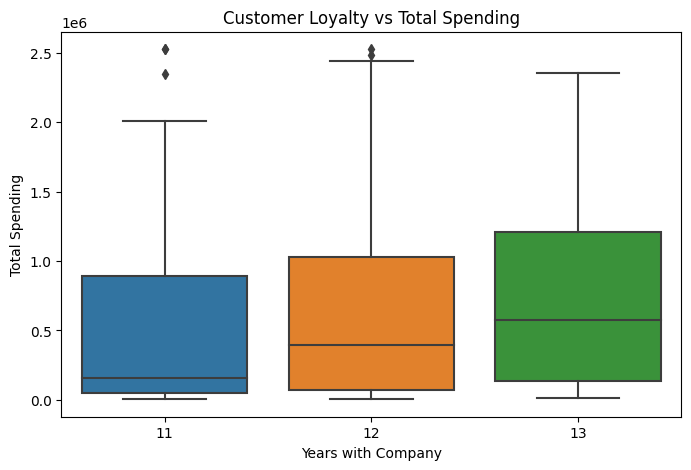

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Customer_years', y='Total_Spend', data=df)
plt.title("Customer Loyalty vs Total Spending")
plt.xlabel("Years with Company")
plt.ylabel("Total Spending")
plt.show()

In [20]:
#RFM (Recency, Frequency, Monetary) Analysis**
df['Frequency']=df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_years,Age,Total_Spend,Frequency
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,3,11,1,13,68,1617000,22
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,3,11,0,11,71,27000,4
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,3,11,0,12,60,776000,20
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,3,11,0,11,41,53000,6
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,3,11,0,11,44,422000,14


In [22]:
# Assign RFM Scores
df['RFM_scores'] = df['Recency']*-1+df['Frequency']*2+df['Total_Spend']*.1
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_years,Age,Total_Spend,Frequency,RFM_scores
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0,0,3,11,1,13,68,1617000,22,161686.0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,0,3,11,0,11,71,27000,4,2670.0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,0,3,11,0,12,60,776000,20,77614.0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,0,3,11,0,11,41,53000,6,5286.0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,0,3,11,0,11,44,422000,14,42134.0


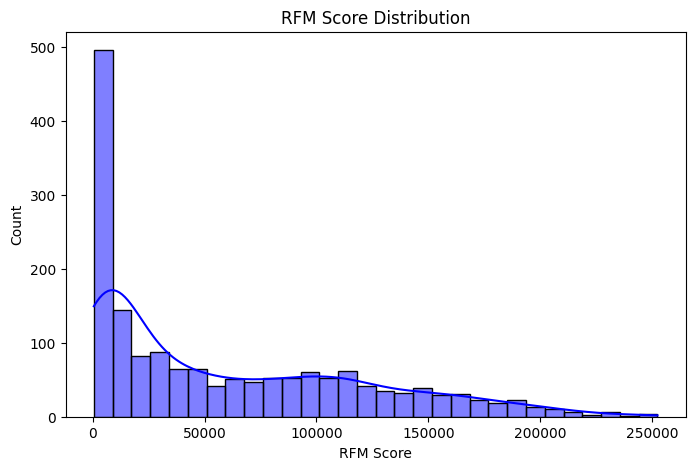

In [25]:
# Visualizing RFM Segments
plt.figure(figsize=(8, 5))
sns.histplot(df['RFM_scores'], bins=30, kde=True, color='blue')
plt.title("RFM Score Distribution")
plt.xlabel("RFM Score")
plt.ylabel("Count")
plt.show()

In [26]:
#Campaign Effectiveness Analysis**
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Campaign_Accepted'] = df[campaign_cols].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_years,Age,Total_Spend,Frequency,RFM_scores,Total_Campaign_Accepted
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0,3,11,1,13,68,1617000,22,161686.0,1
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,3,11,0,11,71,27000,4,2670.0,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,3,11,0,12,60,776000,20,77614.0,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,3,11,0,11,41,53000,6,5286.0,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,3,11,0,11,44,422000,14,42134.0,0


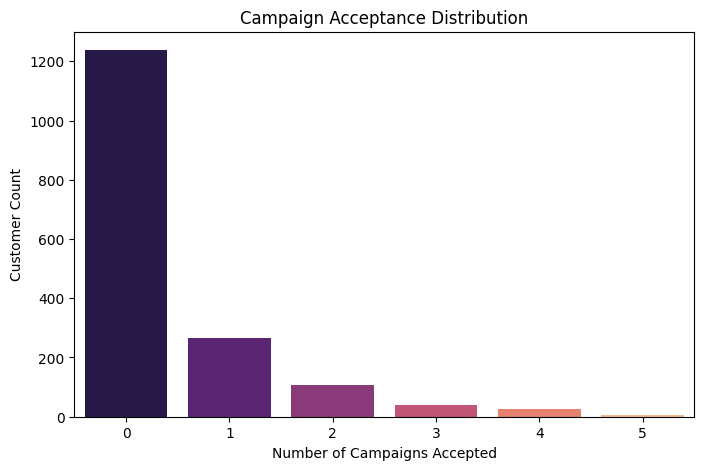

In [27]:
# Count of customers accepting campaigns
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Total_Campaign_Accepted'], palette="magma")
plt.title("Campaign Acceptance Distribution")
plt.xlabel("Number of Campaigns Accepted")
plt.ylabel("Customer Count")
plt.show()

In [28]:
from sklearn.decomposition import PCA
features = ['Total_Spend', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Income']
x = df[features]
# Standardize features
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)
x

,Total_Spend,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Income
0,1617000,8,10,4,58138000.0
1,27000,1,1,2,46344000.0
2,776000,8,2,10,71613000.0
3,53000,2,0,4,26646000.0
4,422000,5,3,6,58293000.0
...,...,...,...,...,...
1675,82000,1,1,4,20193000.0
1676,244000,5,1,4,27573000.0
1677,36000,1,0,3,15862000.0
1678,404000,5,1,8,49544000.0


In [29]:
#Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]
df['PCA1'].head()


0    2.384121
1   -1.784992
2    1.590395
3   -1.944038
4    0.198000
Name: PCA1, dtype: float64

In [30]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df['Cluster'].head()


0    1
1    2
2    3
3    2
4    0
Name: Cluster, dtype: int32

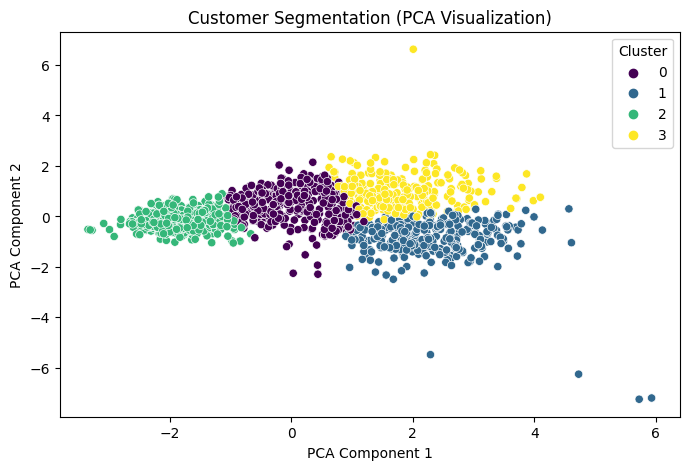

In [31]:
# Plot Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis')
plt.title("Customer Segmentation (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [37]:
#5. Predicting Campaign Acceptance (Classification)**
X = df.drop(columns=['ID', 'Response','Education','Marital_Status','Dt_Customer', 'Cluster', 'PCA1', 'PCA2'])  # Exclude ID and non-relevant features
y = df['Response']
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Customer_years,Age,Total_Spend,Frequency,RFM_scores,Total_Campaign_Accepted
0,1957,58138000.0,0,0,58,635000,88000,546000,172000,88000,...,0,0,3,11,13,68,1617000,22,161686.0,1
1,1954,46344000.0,1,1,38,11000,1000,6000,2000,1000,...,0,0,3,11,11,71,27000,4,2670.0,0
2,1965,71613000.0,0,0,26,426000,49000,127000,111000,21000,...,0,0,3,11,12,60,776000,20,77614.0,0
3,1984,26646000.0,1,0,26,11000,4000,20000,10000,3000,...,0,0,3,11,11,41,53000,6,5286.0,0
4,1981,58293000.0,1,0,94,173000,43000,118000,46000,27000,...,0,0,3,11,11,44,422000,14,42134.0,0


In [38]:
 #Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Predictions
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,